# 라이브러리 로드

In [1]:
# 데이터 분석
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 컬럼 출력 생략 해제
pd.set_option('display.max_columns', None)

# 데이터 로드

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/JounKK/AIS8_Final_HRA/main/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv", index_col="EmployeeNumber")
df_raw.shape

(1470, 34)

In [3]:
df_raw.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


# 데이터 확인 및 전처리

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## 결측치 확인

In [5]:
df_raw.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

## 중복값 확인

In [6]:
df_raw.duplicated().sum()

0

## 문자열 컬럼 확인

In [7]:
# 문자열 컬럼만 출력
df_raw.select_dtypes("object").head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
EmployeeNumber,,,,,,,,,
1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
2,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
4,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
5,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
7,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [8]:
# 문자열 컬럼의 기술통계값
df_raw.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot: xlabel='BusinessTravel', ylabel='count'>

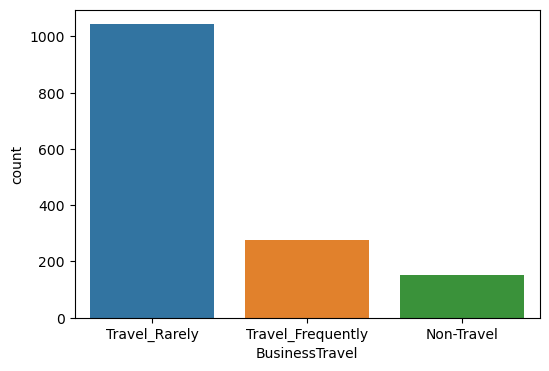

In [9]:
# 출장을 드물게 간 직원이 가장 많음
display(df_raw["BusinessTravel"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df_raw["BusinessTravel"])

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot: xlabel='Department', ylabel='count'>

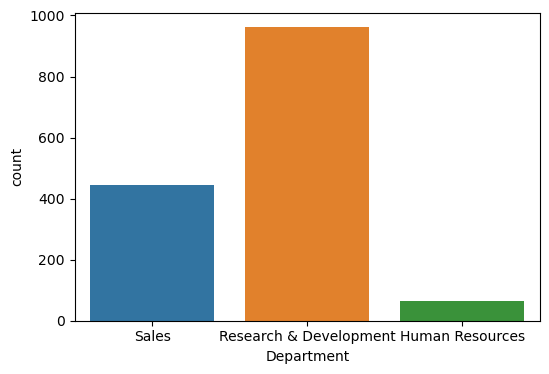

In [10]:
# R&D 부서가 가장 많고, Sales, HR 순.
display(df_raw["Department"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df_raw["Department"])

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot: xlabel='EducationField', ylabel='count'>

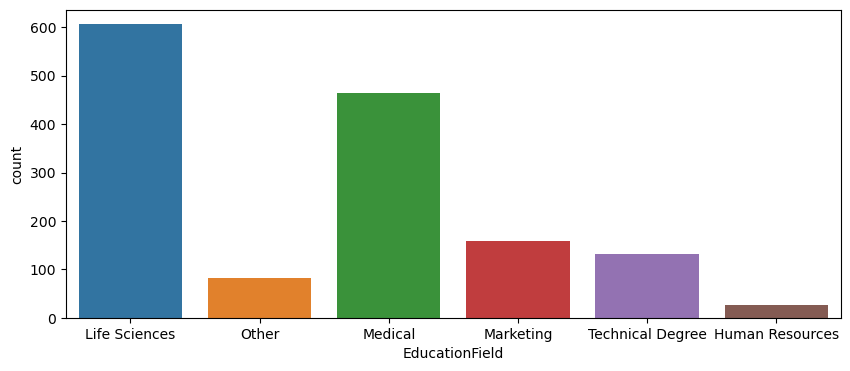

In [11]:
# 생활과학, 의학 계열 교육적 배경을 가진 직원이 많음 -> 도메인
display(df_raw["EducationField"].value_counts())

plt.figure(figsize=(10,4))
sns.countplot(x=df_raw["EducationField"])

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot: xlabel='JobRole', ylabel='count'>

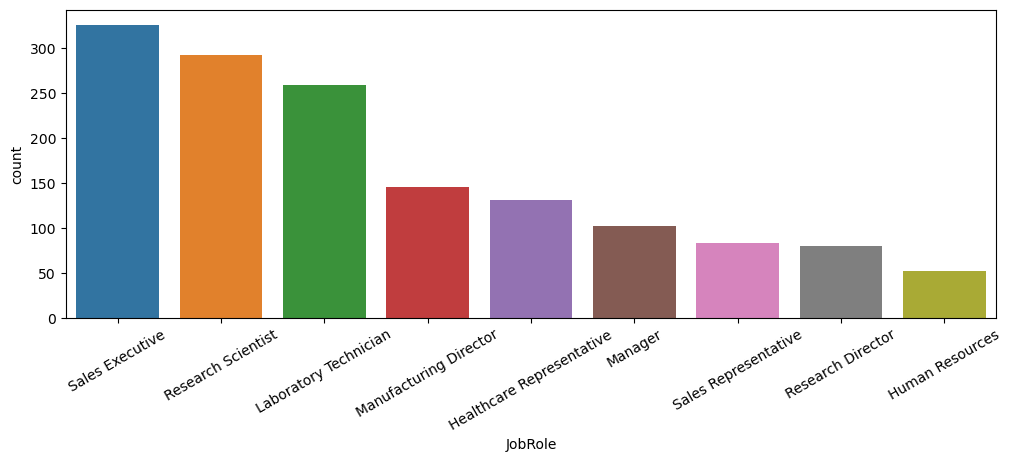

In [12]:
# Sales Executive(영업사원), Research Scientist, Laboratory Technician 순으로 많음. -> 이공계 혹은 의학 계열 제품 개발?
display(df_raw["JobRole"].value_counts())

plt.figure(figsize=(12,4))
plt.xticks(fontsize=10, rotation=30)
sns.countplot(x=df_raw["JobRole"])

# sns.set(font_scale=1.0) <- 이건 x축 제목의 폰트 사이즈 조절

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot: xlabel='MaritalStatus', ylabel='count'>

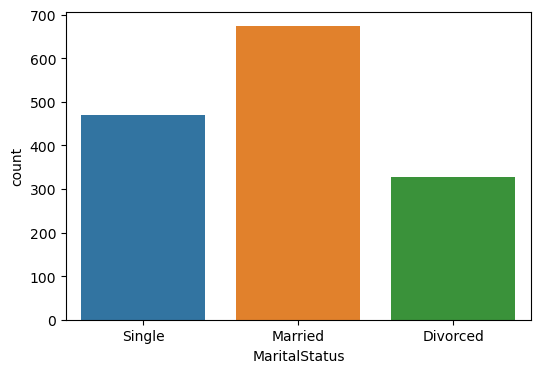

In [13]:
# 기혼자가 많음. 이혼한 직원은 무슨 의미인지? -> 특징 더 살펴보기
display(df_raw["MaritalStatus"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df_raw["MaritalStatus"])

## 수치형 컬럼 확인

In [14]:
# 수치형 컬럼만 출력
df_raw.select_dtypes(exclude="object").head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
2,49,279,8,1,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
4,37,1373,2,2,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
5,33,1392,3,4,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
7,27,591,2,1,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
# 수치형 컬럼의 기술통계값
df_raw.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


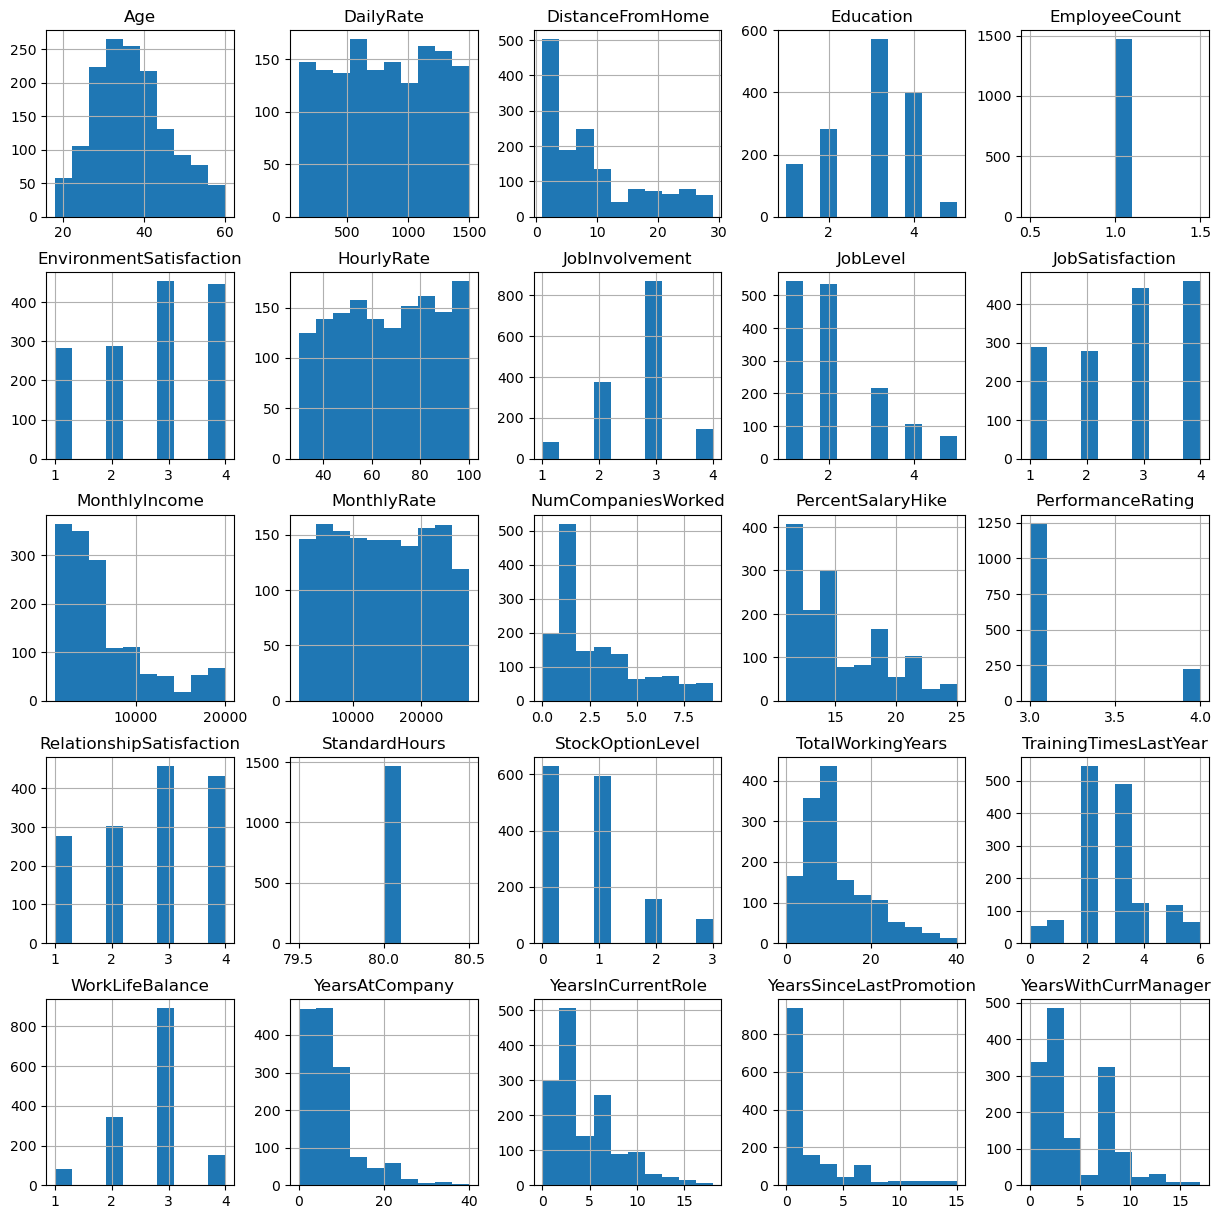

In [16]:
# 수치형 컬럼의 히스토그램

df_raw.hist(figsize=(15,15));

## 불필요한 컬럼 제거

In [17]:
df_raw["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [18]:
df_raw["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

=> `Over18`, `EmployeeCount` 모두 하나의 값만 존재. 불필요한 컬럼으로 판단.

In [19]:
df_raw = df_raw.drop(columns=['Over18', 'EmployeeCount'])
df_raw.shape

(1470, 32)

## label 값 분포 확인

In [20]:
# Attrition 분포 -> 불균형 데이터
df_raw["Attrition"].value_counts(1)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

<AxesSubplot: xlabel='Attrition', ylabel='count'>

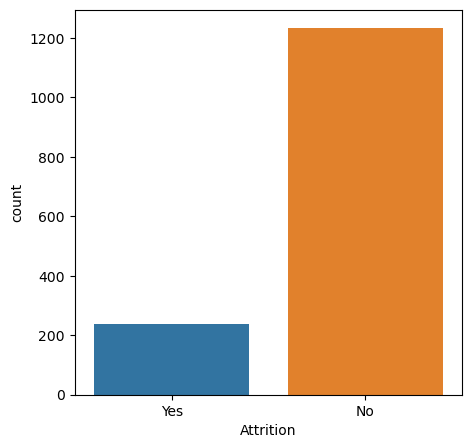

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_raw["Attrition"])

# 파생변수 생성

## 연령대(Age_cat)

In [22]:
# 연령대 함수
def age_categorize(age):
    age = (age//10) * 10
    return age

In [23]:
# '연령대' 컬럼 추가
df_raw['Age_cat'] =  df_raw['Age'].apply(age_categorize)
df_raw.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_cat
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5,40
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7,40
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0,30
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0,30
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2,20


## 경력자 여부 (Experienced)